In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

n_frames = 9859

In [220]:
f = open('dist_dmg.json', 'r')

data = json.load(f)
dist = [None] * len(data['obsels'])
p1_dmgs = [None] * len(data['obsels'])
p2_dmgs = [None] * len(data['obsels'])
p1_stocks = [None] * len(data['obsels'])
p2_stocks = [None] * len(data['obsels'])
p1t_x = [None] * len(data['obsels'])
p1t_y = [None] * len(data['obsels'])
p2t_x = [None] * len(data['obsels'])
p2t_y = [None] * len(data['obsels'])

for d in data['obsels']:
    dist[d['m:n'] - 1] = d['m:distance']
    p1_dmgs[d['m:n'] - 1] = d['m:p1_dmg']
    p2_dmgs[d['m:n'] - 1] = d['m:p2_dmg']
    p1_stocks[d['m:n'] - 1] = d['m:p1_stocks']
    p2_stocks[d['m:n'] - 1] = d['m:p2_stocks']
    p1t_x[d['m:n'] - 1] = d['m:p1_x']
    p1t_y[d['m:n'] - 1] = d['m:p1_y'] * -1
    p2t_x[d['m:n'] - 1] = d['m:p2_x']
    p2t_y[d['m:n'] - 1] = d['m:p2_y'] * -1
print(dist[:10])

[147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0]


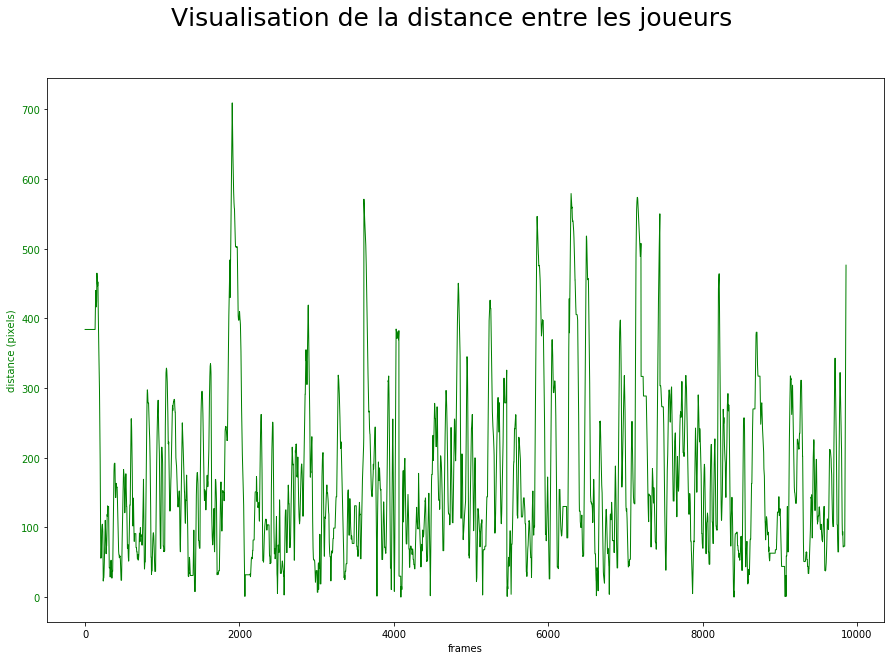

In [205]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la distance entre les joueurs' , fontsize=25)
ax1.set_xlabel('frames')
ax1.set_ylabel('distance (pixels)', color='g')
ax1.plot(np.sqrt(dist), 'g', linewidth=1)
ax1.tick_params(axis='y', labelcolor='g')

plt.show()

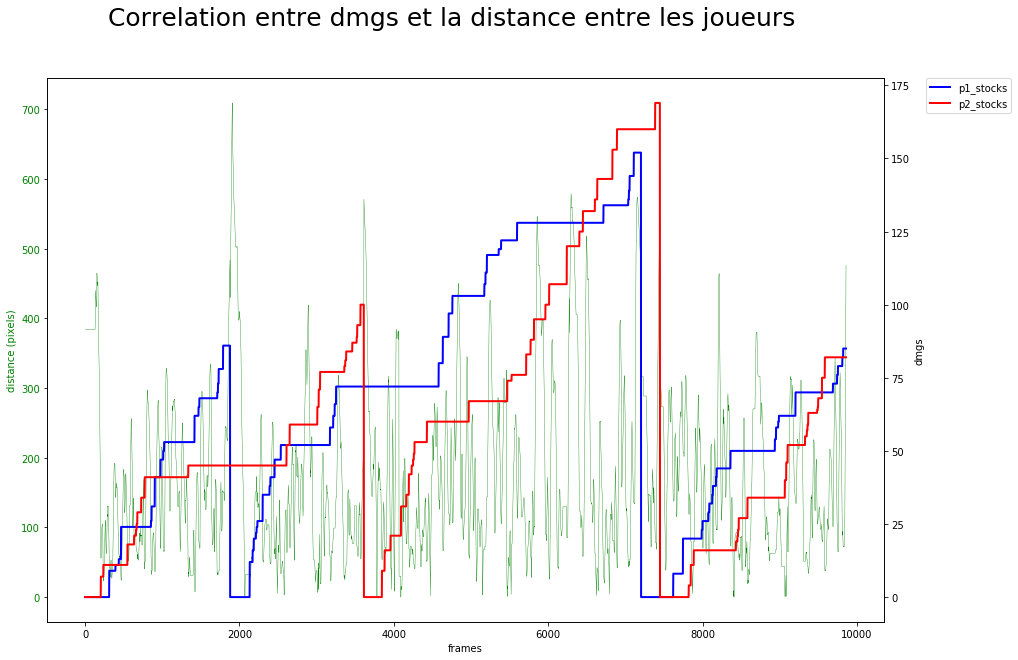

In [211]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Correlation entre dmgs et la distance entre les joueurs' , fontsize=25)
ax1.set_xlabel('frames')
ax1.set_ylabel('distance (pixels)', color='g')
ax1.plot(np.sqrt(dist), 'g', linewidth = .35)
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.set_ylabel('dmgs')
ax2.plot(p1_dmgs, 'b', label='p1_stocks', linewidth=2)
ax2.plot(p2_dmgs, 'r', label='p2_stocks', linewidth=2)
ax2.tick_params(axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

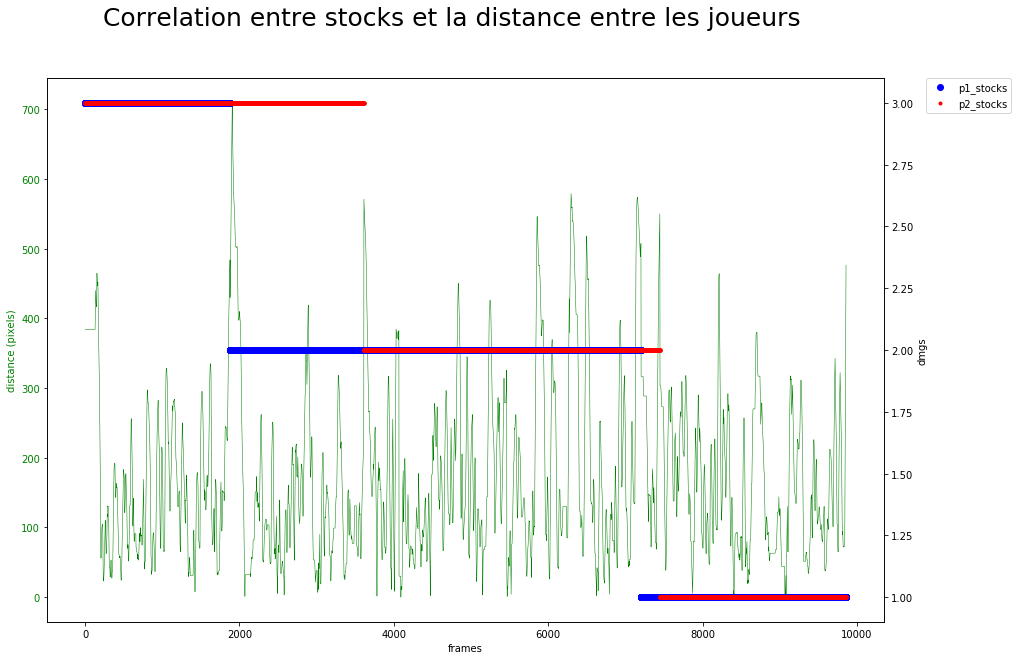

In [204]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Correlation entre stocks et la distance entre les joueurs' , fontsize=25)
ax1.set_xlabel('frames')
ax1.set_ylabel('distance (pixels)', color='g')
ax1.plot(np.sqrt(dist), 'g', linewidth = .5)
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.set_ylabel('dmgs')
ax2.plot(p1_stocks, 'bo', label='p1_stocks')
ax2.plot(p2_stocks, 'r.', label='p2_stocks')
ax2.tick_params(axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [62]:
f = open('states.json', 'r')

data_states = json.load(f)
p1_state_12 = [None] * n_frames
background_p1 = [1] * n_frames
background_p2 = [.9] * n_frames
p2_state_12 = [None] * n_frames
count_p1_state_12 = 0
count_p2_state_12 = 0
for d in data_states['obsels']:
    if d['m:p1_state'] == 12:
        p1_state_12[d['m:n'] - 1] = 1
        count_p1_state_12 += 1
    if d['m:p2_state'] == 12:
        p2_state_12[d['m:n'] - 1] = .9
        count_p2_state_12 += 1
print(p1_state_12[:10])

[None, None, None, None, None, None, None, None, None, None]


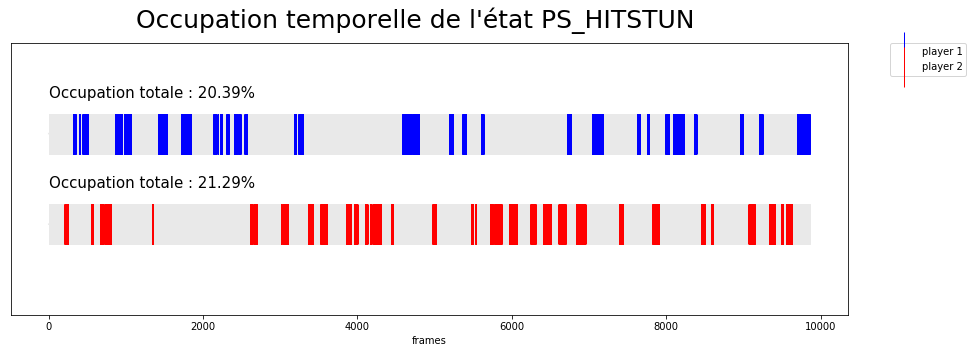

In [203]:
fig, ax = plt.subplots(figsize=(15, 5))

fig.suptitle('Occupation temporelle de l\'état PS_HITSTUN' , fontsize=25)
ax.set_xlabel('frames')
ax.plot(background_p1, color='#E9E9E9', marker='|', markersize=40)
ax.plot(background_p2, color='#E9E9E9', marker='|', markersize=40)
ax.plot(p1_state_12, 'b|', markersize=40, label='player 1')
ax.plot(p2_state_12, 'r|', markersize=40, label='player 2')

ax.text(0, 1.04, 'Occupation totale : ' + '%.2f'%(100.0 * count_p1_state_12 / n_frames) + '%', fontsize=15)

ax.text(0, 0.94, 'Occupation totale : ' + '%.2f'%(100.0 * count_p2_state_12 / n_frames) + '%', fontsize=15)

ax.get_yaxis().set_visible(False)
plt.ylim(.8, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [169]:
f = open('jumpsquat_positions_roa.json', 'r')

data_states = json.load(f)
p1_x_1 = [None] * n_frames
p1_y_1 = [None] * n_frames
p2_x_1 = [None] * n_frames
p2_y_1 = [None] * n_frames

for d in data_states['obsels']:
    if d['m:p1_state'] == 12:
        p1_x_1[d['m:n'] - 1] = d['m:p1_x']
        p1_y_1[d['m:n'] - 1] = d['m:p1_y'] * -1
    if d['m:p2_state'] == 12:
        p2_x_1[d['m:n'] - 1] = d['m:p2_x']
        p2_y_1[d['m:n'] - 1] = d['m:p2_y'] * -1
print(p1_x_1[:10])

[None, None, None, None, None, None, None, None, None, None]


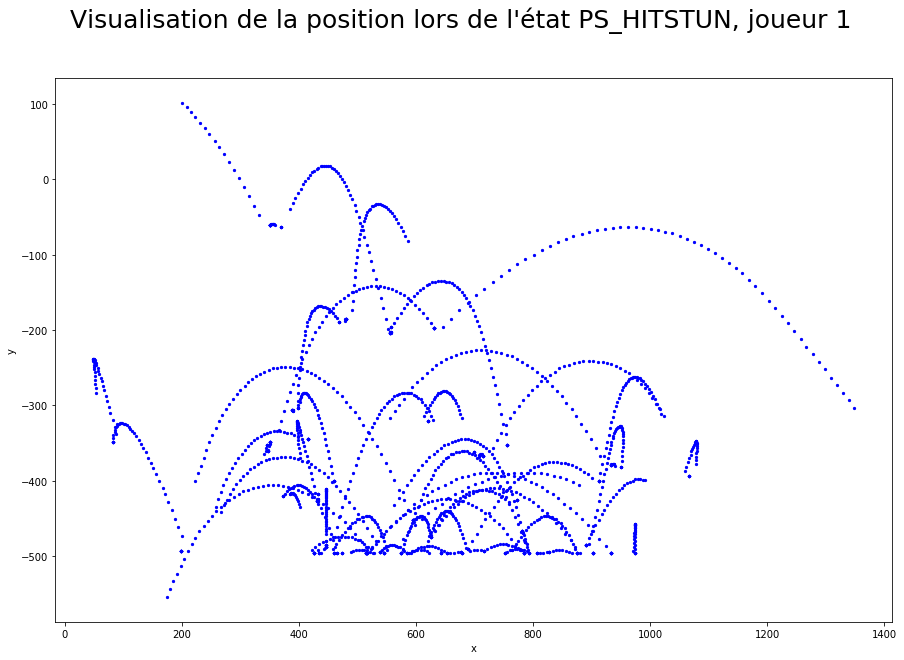

In [185]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position lors de l\'état PS_HITSTUN, joueur 1' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p1_x_1, p1_y_1, color='b', s=5)

plt.show()

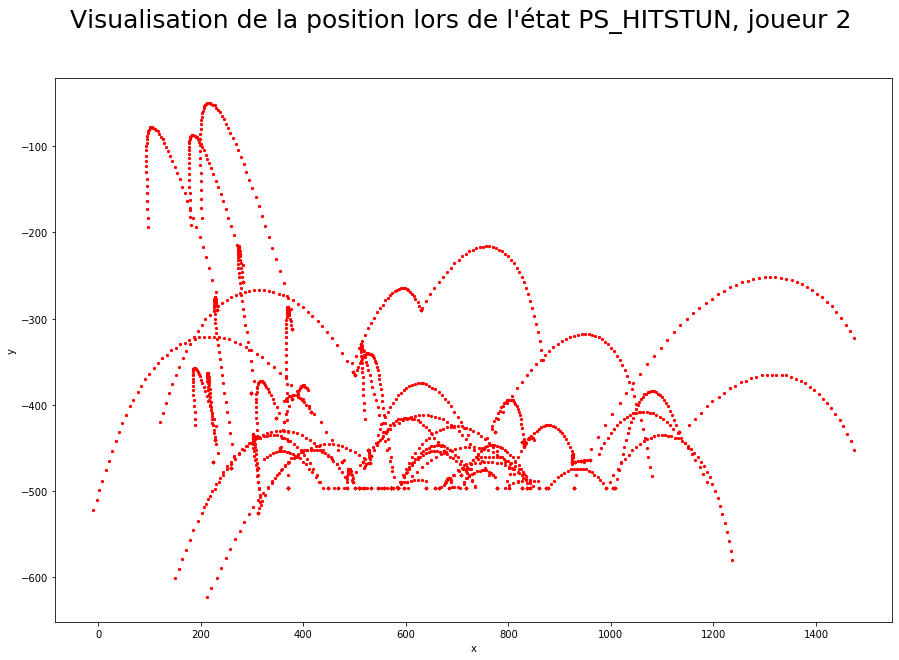

In [187]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position lors de l\'état PS_HITSTUN, joueur 2' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p2_x_1, p2_y_1, color='r', s=5)

plt.show()

In [167]:
f = open('jumpsquat.json', 'r')

data_states = json.load(f)
p1_state_28 = [None] * n_frames
p2_state_28 = [None] * n_frames
count_p1_state_28 = 0
count_p2_state_28 = 0
background_p1_2 = [190] * n_frames
background_p2_2 = [-20] * n_frames
for d in data_states['obsels']:
    if d['m:p1_state'] == 28:
        p1_state_28[d['m:n'] - 1] = 190
        count_p1_state_28 += 1
    if d['m:p2_state'] == 28:
        p2_state_28[d['m:n'] - 1] = -20
        count_p2_state_28 += 1
print(p1_state_28[:10])

[None, None, None, None, None, None, None, None, None, None]


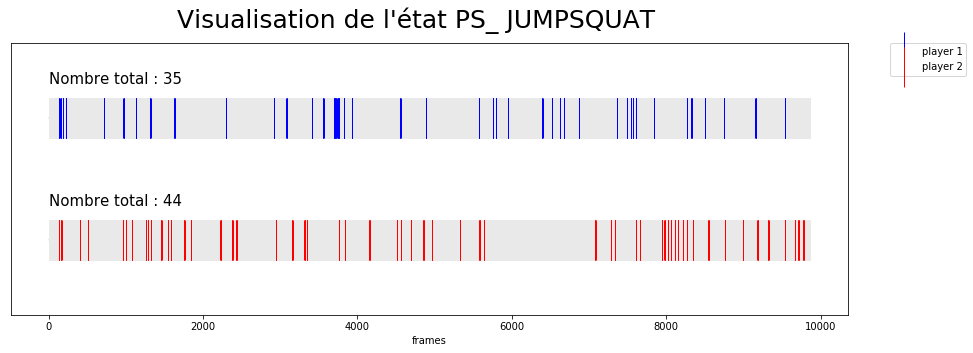

In [127]:
fig, ax = plt.subplots(figsize=(15, 5))

fig.suptitle('Visualisation de l\'état PS_ JUMPSQUAT' , fontsize=25)
ax.set_xlabel('frames')
ax.plot(background_p1_2, color='#E9E9E9', marker='|', markersize=40)
ax.plot(background_p2_2, color='#E9E9E9', marker='|', markersize=40)
ax.plot(p1_state_28, 'b|', markersize=40, label='player 1')
ax.plot(p2_state_28, 'r|', markersize=40, label='player 2')

ax.text(0, 250, 'Nombre total : ' + str(count_p1_state_28 // 5), fontsize=15)

ax.text(0, 38, 'Nombre total : ' + str(count_p2_state_28 // 5), fontsize=15)

ax.get_yaxis().set_visible(False)
plt.ylim(-150, 320)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

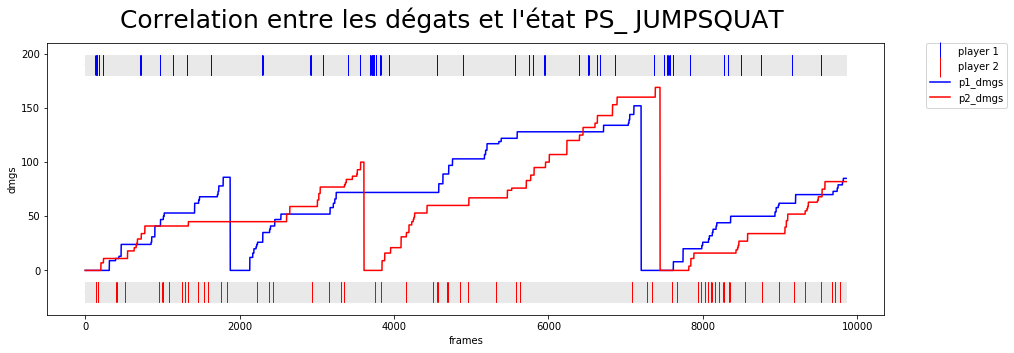

In [202]:
fig, ax = plt.subplots(figsize=(15, 5))

fig.suptitle('Correlation entre les dégats et l\'état PS_ JUMPSQUAT' , fontsize=25)
ax.set_xlabel('frames')
ax.plot(background_p1_2, color='#E9E9E9', marker='|', markersize=20)
ax.plot(background_p2_2, color='#E9E9E9', marker='|', markersize=20)
ax.plot(p1_state_28, 'b|', markersize=20, label='player 1')
ax.plot(p2_state_28, 'r|', markersize=20, label='player 2')

ax.set_ylabel('dmgs')
ax.plot(p1_dmgs, 'b', label='p1_dmgs')
ax.plot(p2_dmgs, 'r', label='p2_dmgs')
ax.tick_params(axis='y')

plt.ylim(-41, 210)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [153]:
f = open('jumpsquat.json', 'r')

data_states = json.load(f)
p1_x = [None] * n_frames
p1_y = [None] * n_frames
p2_x = [None] * n_frames
p2_y = [None] * n_frames

for d in data_states['obsels']:
    if d['m:p1_state'] == 28:
        p1_x[d['m:n'] - 1] = d['m:p1_x']
        p1_y[d['m:n'] - 1] = d['m:p1_y'] * -1
    if d['m:p2_state'] == 28:
        p2_x[d['m:n'] - 1] = d['m:p2_x']
        p2_y[d['m:n'] - 1] = d['m:p2_y'] * -1
print(p1_x[:10])

[None, None, None, None, None, None, None, None, None, None]


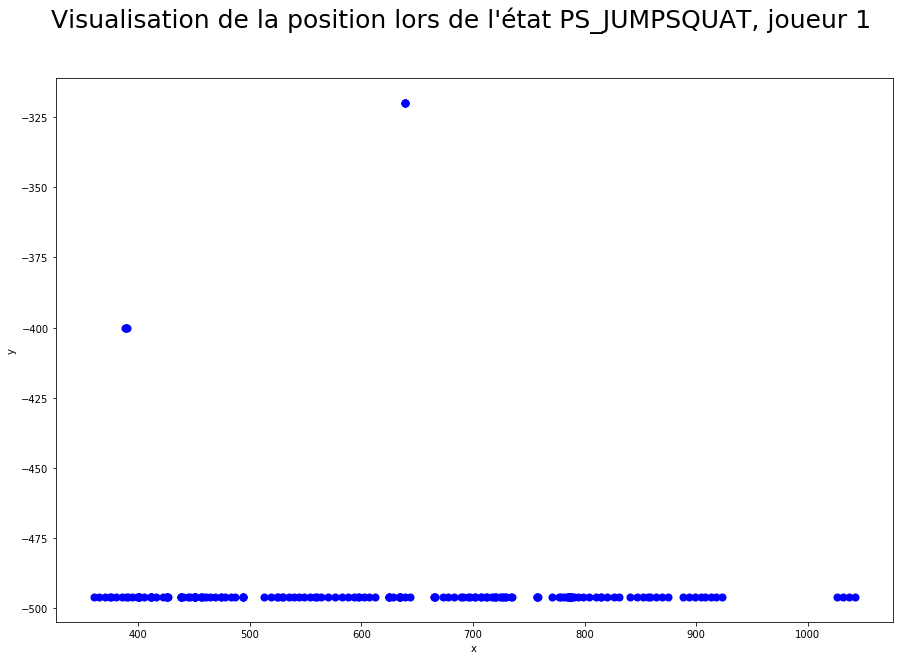

In [192]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position lors de l\'état PS_JUMPSQUAT, joueur 1' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p1_x, p1_y, color='b', s=50)

plt.show()

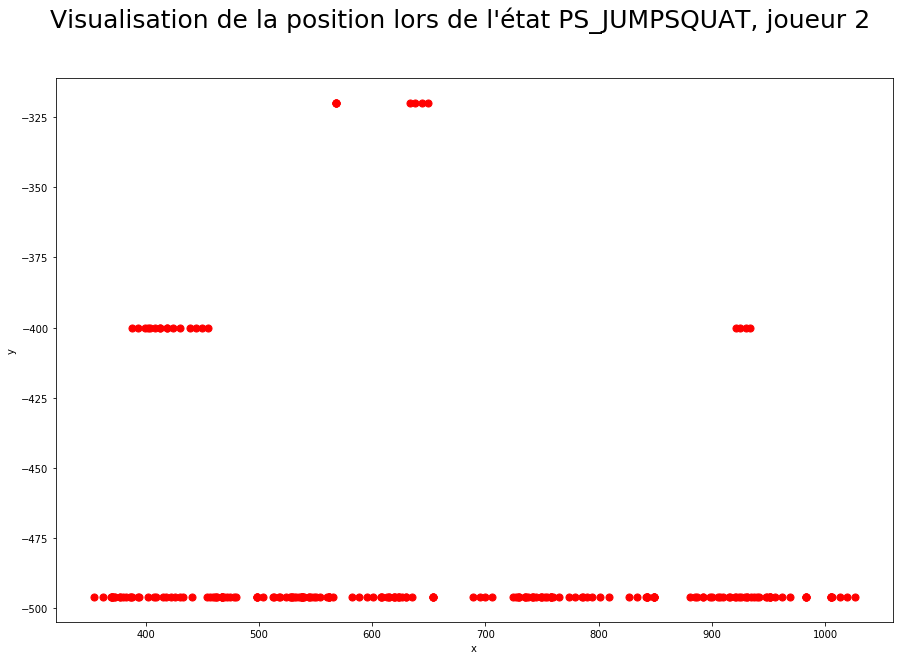

In [212]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position lors de l\'état PS_JUMPSQUAT, joueur 2' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p2_x, p2_y, color='r', s=50)

plt.show()

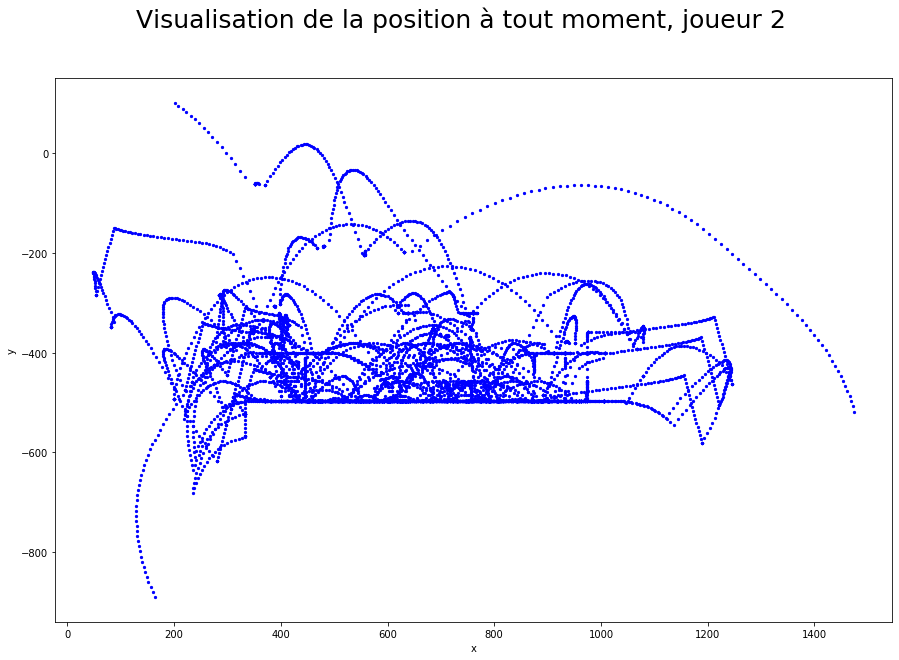

In [228]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position à tout moment, joueur 2' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p1t_x, p1t_y, color='b', s=5)

plt.show()

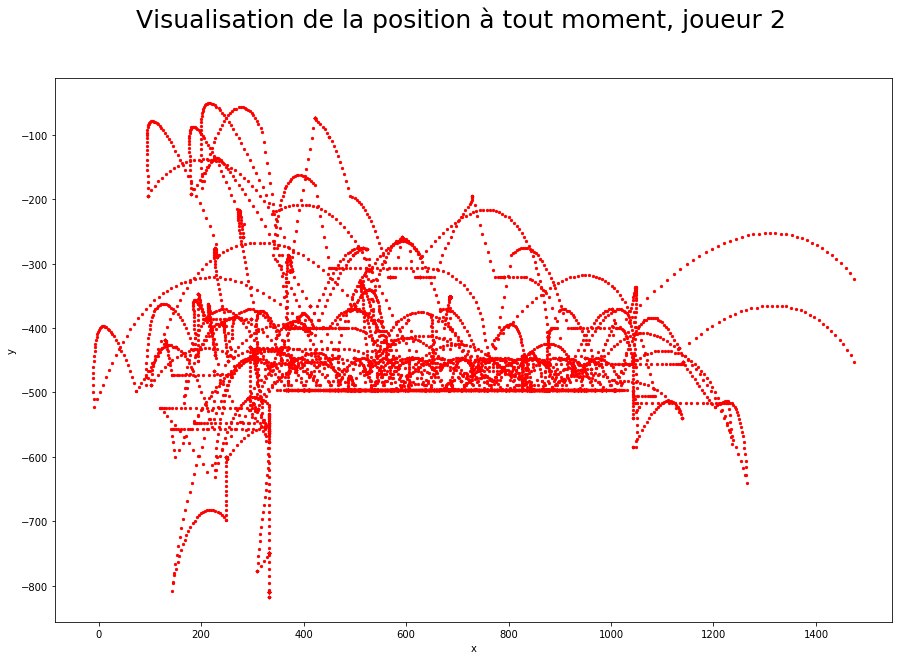

In [227]:
fig, ax1 = plt.subplots(figsize=(15, 10))

fig.suptitle('Visualisation de la position à tout moment, joueur 2' , fontsize=25)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(p2t_x, p2t_y, color='r', s=5)

plt.show()